## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fetch Data

In [2]:
def fetch_data(filename):
	fetch_dir = os.path.join(os.getcwd(), 'data')
	data_path = os.path.join(fetch_dir, f"{filename}.parquet")
	return pd.read_parquet(data_path)

In [3]:
df = fetch_data('train')
df = df.astype({"rating": "int"})
df

,user_id,product_id,rating,timestamp
0,AKOP2TUFBZOAV,B004N625BY,5,1399593600
1,A2M49J0G7K13CJ,B004W8ICGK,1,1360713600
2,A392E6D0BF3IHO,B001TK3D4A,1,1308787200
3,A12ET06IO3ZJGW,B002NWN6M2,4,1348272000
4,ASOQMLJ0TTUB4,B002ZBCCU8,5,1329091200
...,...,...,...,...
7433252,AN3MTN0PP9EWH,B00C1AGE6G,1,1404172800
7433253,A1WMYMK2KP4NNQ,B0013PQ6P4,4,1270425600
7433254,AKUHWCJEXGFM9,B005HTZW2U,5,1336867200
7433255,A2IMGUQZRJ26TU,B002WLHPNK,5,1373068800


## Summary Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433257 entries, 0 to 7433256
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   product_id  object
 2   rating      int32 
 3   timestamp   int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 198.5+ MB


In [5]:
df.shape

(7433257, 4)

In [6]:
df.describe()

,rating,timestamp
count,7.433257e+06,7.433257e+06
mean,4.012448e+00,1.338177e+09
std,1.380818e+00,6.900519e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315267e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
df.describe(include="O")

,user_id,product_id
count,7433257,7433257
unique,4055607,466792
top,A5JLAU2ARJ0BO,B0074BW614
freq,494,17396


In [8]:
df.isna().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

- Train data consists of about `7.5 million records`
- Has 2 numeric columns and 2 categorical columns
- Based on summary statistics:
  - 25% observations have rating up to 3
  - 25% observations have rating from 3 to 5
  - 50% observations have rating of 5
  - There are about `4 million unique users` who have reviewed products
  - There are about `470 thousand unique products` that were reviewed
  - The user `A5JLAU2ARJ0BO` has given the most no. of reviews (~ 500)
  - The product `B0074BW614` has received the most no. of reviews (~ 17000)
- There are `no missing values` in the training set

## Rating

In [9]:
(
	df.rating
	.value_counts()
	.pipe(lambda ser: pd.concat([ser, df.rating.value_counts(normalize=True)], axis=1))
	.sort_index()
	.set_axis(['freq', 'percentage'], axis=1)
)

,freq,percentage
1,856447,0.115218
2,433575,0.058329
3,601244,0.080886
4,1411728,0.189921
5,4130263,0.555646


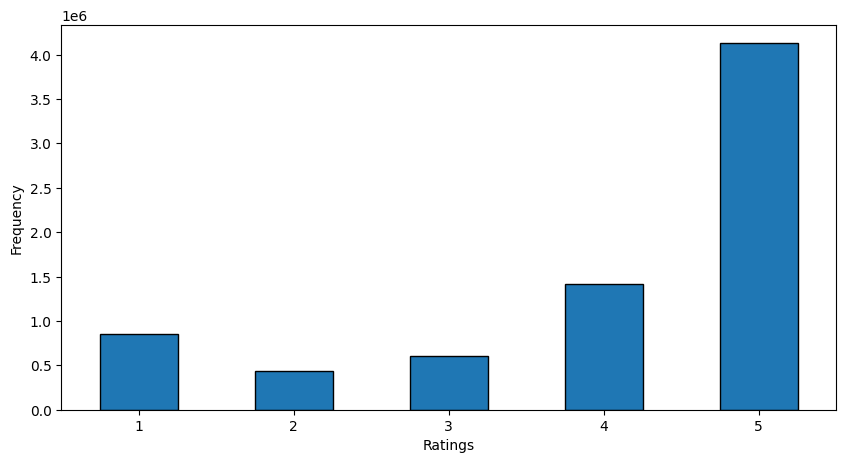

In [10]:
plt.figure(figsize=(10, 5))

(
	df.rating
	.value_counts()
	.sort_index()
	.plot(kind='bar', edgecolor='black')
)
plt.xlabel("Ratings")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

plt.show()

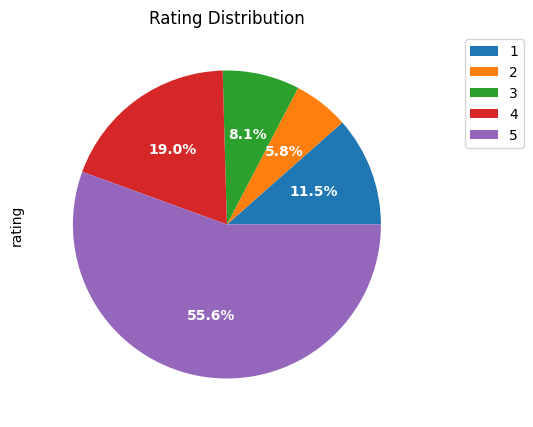

In [11]:
plt.figure(figsize=(10, 5))

(
	df.rating
	.value_counts()
	.sort_index()
	.plot(
		kind='pie',
		autopct='%1.1f%%',
		title='Rating Distribution',
		textprops=dict(color='white', weight='bold')
	)
)
# plt.xlabel("Ratings")
# plt.xticks(rotation=0)
# plt.ylabel("Frequency")
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()

- Almost `55%` ratings are of 5 stars
- Very few users have given 2 stars

## Top 10 Users who have given the most no. of Reviews

In [12]:
(
	df.user_id
	.value_counts()
	.sort_values(ascending=False)
	.head(10)
)

A5JLAU2ARJ0BO     494
ADLVFFE4VBT8      475
A3OXHLG6DIBRW8    474
A6FIAB28IS79      408
A680RUE1FDO8B     387
A1ODOGXEYECQQ8    354
A36K2N527TXXJN    303
AWPODHOB4GFWL     300
A2AY4YUOX2N1BQ    289
ARBKYIVNYWK3C     288
Name: user_id, dtype: int64

- The top 10 such users have each given atleast 288 reviews on products
- Only 3 users have given `470 and above` total reviews

## Top 10 Users who have given the Highest Average Ratings

#### Criteria:
- The users should have given more than 10 reviews to be considered

In [13]:
(
	df.user_id
	.value_counts()
	.rename('freq')
	.to_frame()
	.query("freq > 10")
	.join(df.set_index('user_id'))
	.reset_index(names='user_id')
	.groupby('user_id')['rating']
	.mean()
	.sort_values(ascending=False)
	.head(10)
)

user_id
A0279100VZXR9A2495P4    5.0
A24SP9MHTDE9AB          5.0
A300T9OR1F6QER          5.0
A16088F4D2K0Z1          5.0
AQOVCKBMUBVS5           5.0
A24UZIUL0V11PZ          5.0
A24TID7JRCS7ZY          5.0
A3046XM1BG5LGX          5.0
A304B8P50JOE3O          5.0
AEA87UQE4GY9K           5.0
Name: rating, dtype: float64

- The top 10 such users have all given 5 star ratings in all their reviews

## Top 10 Products that have been given the most no. of Reviews

In [14]:
(
	df.product_id
	.value_counts()
	.sort_values(ascending=False)
	.head(10)
)

B0074BW614    17396
B00DR0PDNE    15630
B007WTAJTO    13434
B0019EHU8G    11700
B006GWO5WK    11608
B003ELYQGG    11058
B003ES5ZUU     9748
B007R5YDYA     9392
B00622AG6S     9322
B0002L5R78     9010
Name: product_id, dtype: int64

- The top 10 such products have each been given atleast `9,000 or more` reviews
- Only one product has been reviewed more than `17,000 times`
- There are 6 products that have been reviewed more than `10,000 times`

## Top 10 Products that have received the Highest Average Ratings

#### Criteria:
- The products should have been given more than 10 reviews to be considered

In [15]:
(
	df.product_id
	.value_counts()
	.rename('freq')
	.to_frame()
	.query("freq > 10")
	.join(df.set_index('product_id'))
	.reset_index(names='product_id')
	.groupby('product_id')['rating']
	.mean()
	.sort_values(ascending=False)
	.head(10)
)

product_id
B002C1BHJ8    5.0
B001CYCK6A    5.0
B00EPDMDZ8    5.0
B0016O3T7A    5.0
B002JGZBJS    5.0
B001OXRTVU    5.0
B00ER8HDME    5.0
B002T3JN0Y    5.0
B009AFL5X2    5.0
B0016J8PQA    5.0
Name: rating, dtype: float64

- The top 10 such products have all been given 5 star ratings in all their reviews